138


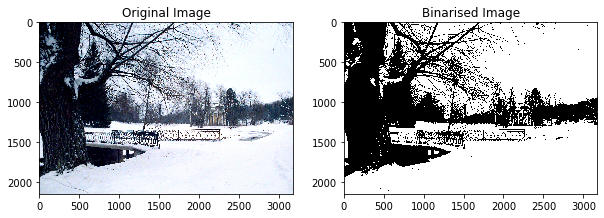

In [2]:
# -*- coding: utf-8 -*-

__author__ = "Ashesh Raj Gnawali"
__email__ = "asgn@nmbu.no"


import matplotlib.pyplot as plt

from skimage import io
import numpy as np


def threshold(image, th=None):
    """Returns a binarised version of given image, thresholded at given value.

    Binarises the image using a global threshold `th`. Uses Otsu's method
    to find optimal thrshold value if the threshold variable is None. The
    returned image will be in the form of an 8-bit unsigned integer array
    with 255 as white and 0 as black.

    Parameters:
    -----------
    image : np.ndarray
        Image to binarise. If this image is a colour image then the last
        dimension will be the colour value (as RGB values).
    th : numeric
        Threshold value. Uses Otsu's method if this variable is None.

    Returns:
    --------
    binarised : np.ndarray(dtype=np.uint8)
        Image where all pixel values are either 0 or 255.
    """
    # Setup
    shape = np.shape(image)
    binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    if th is None:
        th = otsu_thval(image)

        print(th)

    binarised = image > th

    return binarised


def histogram(image):
    """Returns the image histogram with 256 bins.
    """
    # Setup
    shape = np.shape(image)
    histogram = np.zeros(256)
    

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    
#    here [0] means we want to extract only pixel values
    histogram = np.histogram(image.ravel(), np.array(range(0,257)))[0]
    return histogram #we hust return pixel values which is used to find the otsu threshold value


def otsu_thval(image):
    """Finds the optimal thresholdvalue of given image using Otsu's method.
    """
    hist = histogram(image)
    th = 0
    
    
    total_pixel = np.sum(hist) #finding total sum of the pixels of the image
    
    levels = np.array(range(0,256))
    temp = -1 #declaring temporary value
    
    for i in range(1, len(levels)):
        
        #finding weight of background and foreground
        wb = (np.sum(hist[:i])) / total_pixel
        wf = (np.sum(hist[i:])) / total_pixel
        
        #finding mean of background and foreground
        meanb = np.sum(levels[:i] * hist[:i]) / np.sum(hist[:i])
        meanf = np.sum(levels[i:] * hist[i:]) / np.sum(hist[i:])
        
        #finding between class variance(bcv) 
        bcv = wb * wf * (meanb - meanf) ** 2
        
        #checking in such a way that biggest between class variance is obtained
        if bcv > temp:
            th = i
            temp = bcv  
    
    return th


if __name__ == "__main__":
    filename = "Bridge.jpg"
    image = io.imread(filename)
    
    binarised_image = threshold(image)
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title("Original Image")
    
    ax[1].imshow(binarised_image, cmap=plt.cm.gray)
    ax[1].set_title("Binarised Image")

